In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv 
import math

In [3]:
MAIN_DIR_NAME = "/Users/yishaiazabary/Desktop/University/DNA Deformat proteins research/extractedStatistics/"
RADIIS = np.array(list(range(0,2001, 200)))

/Users/yishaiazabary/venv/untitled/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


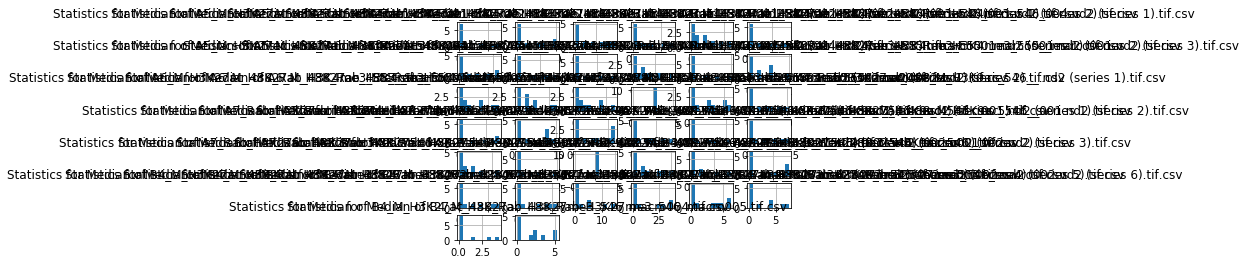

<Figure size 432x288 with 0 Axes>

In [8]:
def count_neighbors_in_radii(first_channel:pd.DataFrame, second_channel:pd.DataFrame):
    ans = np.zeros(shape=(len(RADIIS)))
    spots_radii_object_count = pd.DataFrame(columns=['spotID', 'radius', 'objectInRadius'])
    for index, single_spot in first_channel.iterrows():
        total_amount_of_second_spots = len(first_channel)
        distance_to_second_spots = np.sqrt(np.power(single_spot['X'] - second_channel_objects['X'], 2) + np.power(single_spot['Y'] - second_channel_objects['Y'], 2))
        for radii_index in range(len(RADIIS)-1):
             spots_radii_object_count = pd.concat([spots_radii_object_count, pd.DataFrame({"spotID":[index], 'radius':[RADIIS[radii_index]],"objectInRadius": [len(distance_to_second_spots.values[(distance_to_second_spots.values >= RADIIS[radii_index])&(distance_to_second_spots.values < RADIIS[radii_index + 1])])]})])
    # averaging the number of spots in each radius 
    for idx, radius in enumerate(RADIIS):
        spots_in_radii = spots_radii_object_count[spots_radii_object_count['radius']==radius]['objectInRadius'].values
        ans[idx] = np.mean([0] if len(spots_in_radii)==0 else spots_in_radii)
        
    return ans
    

files_objects_in_radiis_average = dict()
path_to_all_channels_dirs = MAIN_DIR_NAME
channels_dirs = [dir_name[0]+"/" for dir_name in os.walk(path_to_all_channels_dirs)][1:]
channel1FilesList = [file_path[2] for file_path in os.walk(channels_dirs[0])][0]
channel1FilesList.remove('.DS_Store')
channel2FilesLisr = [file_path[2] for file_path in os.walk(channels_dirs[1])][0]
channel2FilesLisr.remove('.DS_Store')
for file_ctr in range(len(channel1FilesList)):
    # Green to red
    first_channel_objects = pd.read_csv(channels_dirs[0]+channel1FilesList[file_ctr]).loc[:, ['X', 'Y', 'Z']]
    first_channel_objects = first_channel_objects[(first_channel_objects['Z'] >= 2) & (first_channel_objects['Z'] < 3)]
    # z_levels = first_channel_objects['Z'].astype('int').unique()
    second_channel_objects = pd.read_csv(channels_dirs[1]+channel2FilesLisr[file_ctr]).loc[:, ['X', 'Y', 'Z']]
    second_channel_objects = second_channel_objects[(first_channel_objects['Z'] >= 2) & (second_channel_objects['Z'] < 3)]
    
    #count neighbors in radius
    temp = count_neighbors_in_radii(first_channel_objects, second_channel_objects)
    files_objects_in_radiis_average[channel1FilesList[file_ctr]] = temp

pd.DataFrame(files_objects_in_radiis_average).hist()
plt.show()
plt.savefig('test.png', dpi=300)

